In [2]:
import pandas as pd
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt

datafile = 'E:\\Win K\\4th SEM\\PSC\\direct1\\src\\usaccidents\\US_Accidents_Dec21_updated.csv'


In [3]:

# Read CSV 0
df = pd.read_csv(datafile)


Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               i

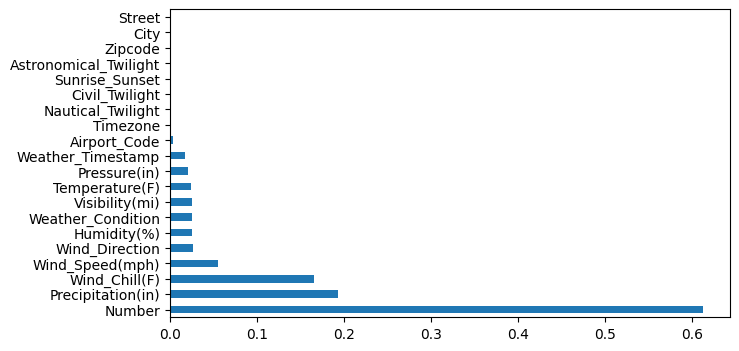

In [5]:

# Read Columns 1
print(df.columns)

# Read  Info 2
output1 = StringIO()
df.info(buf=output1)
print(output1.getvalue())


# Missing values per columns
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
ax = missing_percentages[missing_percentages != 0].plot(kind='barh', figsize=(8,4))
plt.subplots_adjust(left=0.2)
# plt.savefig('E:\\Win K\\4th SEM\\PSC\\direct1\\src\\static\\images\\missing.jpg')

#Remove columns that you don't want to use but not good practice


In [6]:

#Exploratory Analysis & Visualisation

#Cities
df.City #[4]
print(len(df.City.unique())) #[5]

#Cities and their values of accidents
cities_by_accidents = df.City.value_counts()


11682


In [8]:
print('Top 20 cities by accidents')
print(cities_by_accidents[:20])

Top 20 cities by accidents
City
Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: count, dtype: int64


<Axes: ylabel='City'>

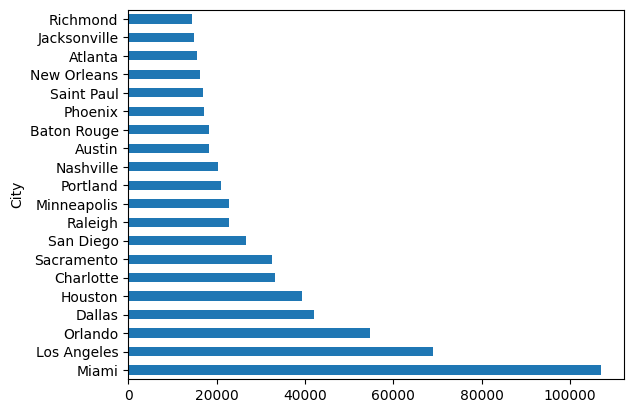

In [10]:
# Top 20 cities by accidents
cities_by_accidents[:20].plot(kind='barh')

In [11]:
import seaborn as sns
sns.set_style("darkgrid")

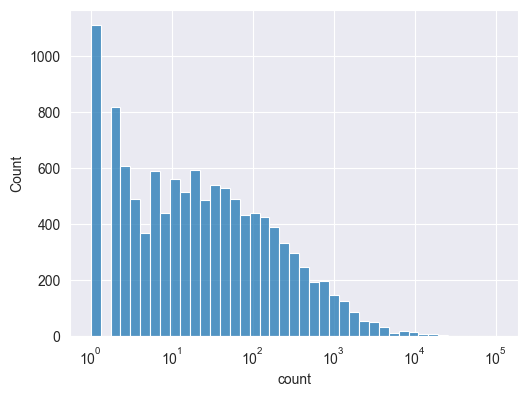

In [86]:
sns.histplot(cities_by_accidents, log_scale=True)
#This shows that 10-100 accidents occur in 400-600 cities
# There are more than 1000 cities with nearly 0 accidents
# While accidents above 1000 count are rarerly occured
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.savefig('E:\\Win K\\4th SEM\\PSC\\direct1\\src\\static\\images\\cityvsacci.jpg')

In [13]:
cities_by_accidents[cities_by_accidents == 1]

City
Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: count, Length: 1110, dtype: int64

In [14]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

C:\Users\Admin\AppData\Local\Temp\ipykernel_126000\3991793377.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Start_Time'] = pd.to_datetime(df_filtered['Start_Time'],format='%Y-%m-%d %H:%M:%S')


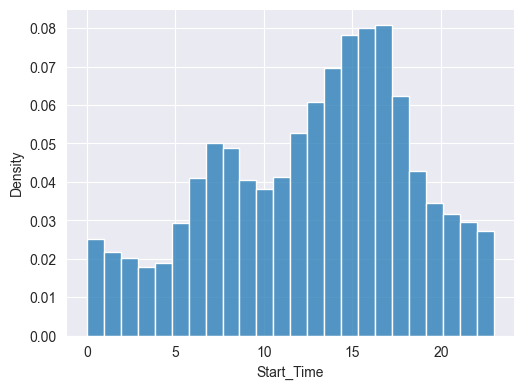

In [88]:
df['Start_Time'] = df['Start_Time'].astype(str)
df_filtered=df[df['Start_Time'].str.match(r'^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}$') == True]

df_filtered['Start_Time'] = pd.to_datetime(df_filtered['Start_Time'],format='%Y-%m-%d %H:%M:%S')
sns.histplot(df_filtered['Start_Time'].dt.hour, bins=24, kde=False, stat='density')
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.savefig('E:\\Win K\\4th SEM\\PSC\\direct1\\src\\static\\images\\starttime.jpg')
# df['Start_Time'] = pd.to_datetime(df['Start_Time'].str.slice(stop=-10), format='%Y-%m-%d %H:%M:%S')

#Most Accidents occured between 3-5pm

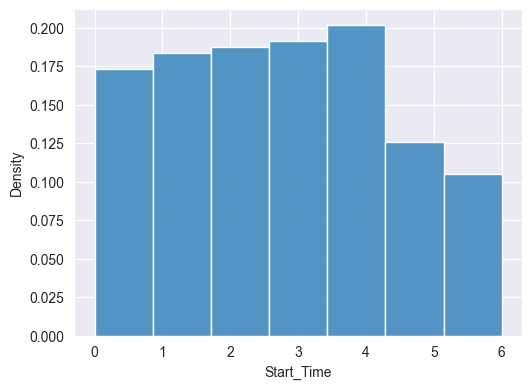

In [89]:
sns.histplot(df_filtered['Start_Time'].dt.dayofweek, bins=7, kde=False, stat='density')
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.savefig('E:\\Win K\\4th SEM\\PSC\\direct1\\src\\static\\images\\weekdata.jpg')
#Distribution of accidents by hour same on weekends and weekdays

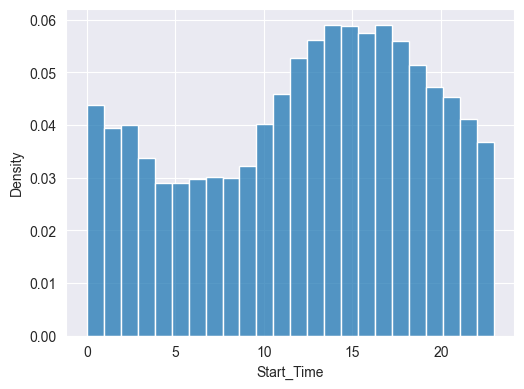

In [90]:
sundays_start_time = df_filtered['Start_Time'][df_filtered['Start_Time'].dt.dayofweek == 6]
sns.histplot(sundays_start_time.dt.hour, bins=24, kde=False, stat='density')

plt.subplots_adjust(left=0.2, bottom=0.2)
plt.savefig('E:\\Win K\\4th SEM\\PSC\\direct1\\src\\static\\images\\sundaydata.jpg')
#Most accidents occurs at noon till evening time and a steep is seen at 12:00 am

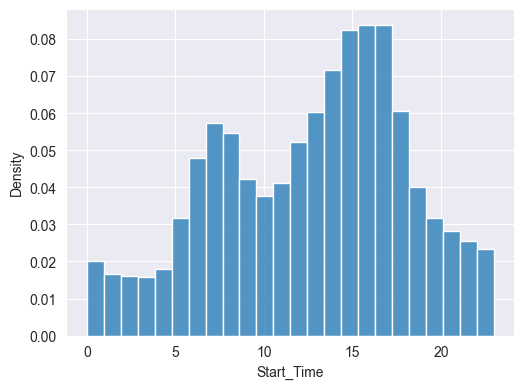

In [91]:
monday_start_time = df_filtered['Start_Time'][df_filtered['Start_Time'].dt.dayofweek == 0]
sns.histplot(monday_start_time.dt.hour, bins=24, kde=False, stat='density')

plt.subplots_adjust(left=0.2, bottom=0.2)
plt.savefig('E:\\Win K\\4th SEM\\PSC\\direct1\\src\\static\\images\\mondaydata.jpg')

#On Monday probably due to people going on work accidents occurr at 8-9 time window and at noon 2-5 pm

In [59]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [60]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

In [95]:
sample_df = df.sample(int(0.1 * len(df)))

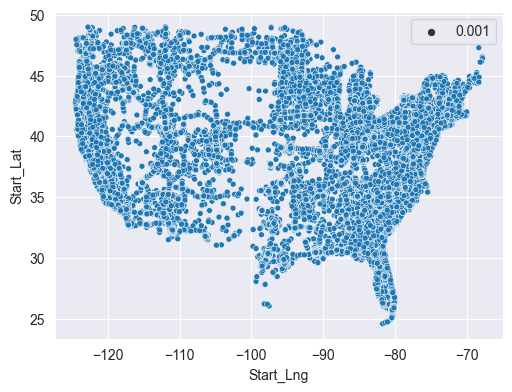

In [97]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.savefig('E:\\Win K\\4th SEM\\PSC\\direct1\\src\\static\\images\\accipos.jpg')

In [77]:
import folium

In [78]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(40.10891, -83.09286)

In [81]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).items():
    print(x[1])

2771365    25.782400
1824190    34.119133
553158     40.154704
2027443    33.319930
1128336    41.120978
             ...    
2685511    33.097130
2687808    36.114000
379660     33.764880
2398458    37.768575
1717959    41.014809
Name: Start_Lat, Length: 100, dtype: float64
2771365    -80.225486
1824190   -117.840259
553158     -74.700079
2027443   -111.927794
1128336    -73.328064
              ...    
2685511    -96.679260
2687808    -86.724380
379660     -84.519721
2398458   -122.153605
1717959    -75.300272
Name: Start_Lng, Length: 100, dtype: float64


In [82]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [83]:
from folium.plugins import HeatMap

In [84]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [85]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

In [101]:
#Temperature Analysis
df['Temperature(F)']

0          42.1
1          36.9
2          36.0
3          39.0
4          37.0
           ... 
2845337    86.0
2845338    70.0
2845339    73.0
2845340    71.0
2845341    79.0
Name: Temperature(F), Length: 2845342, dtype: float64

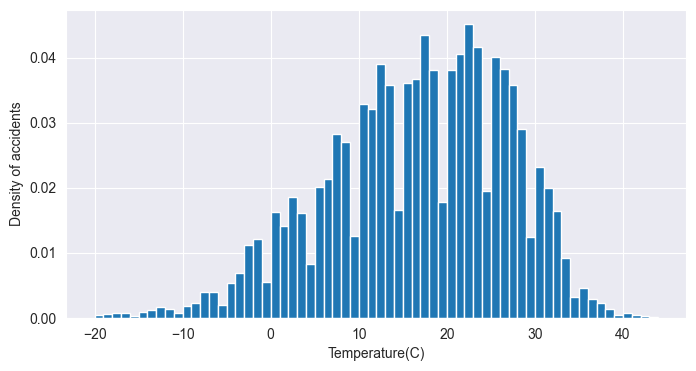

In [173]:
df['Temperature(C)']=(df['Temperature(F)']-32)*(5/9)

df['Temperature(C)'].hist(bins=range(-20,45),density=True, figsize=(8,4))
plt.xlabel('Temperature(C)')
plt.ylabel('Density of accidents')
plt.savefig('E:\\Win K\\4th SEM\\PSC\\direct1\\src\\static\\images\\accivstemp.jpg')
plt.show()

# top60=temp_by_accidents[:100]
# top60sort=top60.sort_index()
# top60sort.plot(kind='bar')
# temp_by_accidents[:60].plot(kind='bar')
# plt.subplots_adjust(left=0.2)
# plt.savefig('E:\\Win K\\4th SEM\\PSC\\direct1\\src\\static\\images\\top20city.jpg')

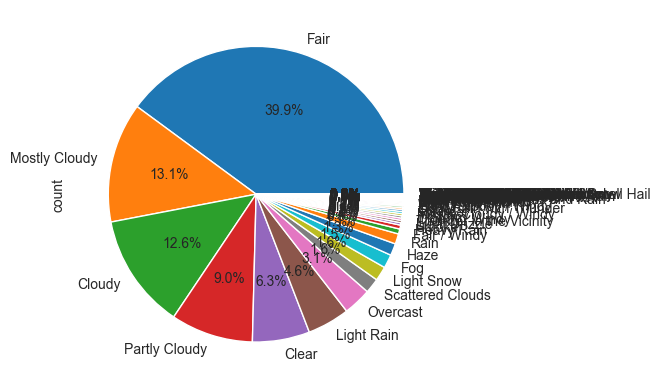

In [174]:
# print(df.Weather_Condition.unique())
weather = df['Weather_Condition'].value_counts()


percent = weather/weather.sum()*100
percent = percent.apply(lambda x: x if x>=0.7 else None)
percent['Others']=percent.isnull().sum()
percent=percent.dropna()
weather.plot.pie(figsize=(8,4.8) ,autopct='%.1f%%')
plt.savefig('E:\\Win K\\4th SEM\\PSC\\direct1\\src\\static\\images\\weather.jpg')

